## Importing Libraries and Dataset


In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
warnings.simplefilter('ignore')

## Loading the Dataset

In [2]:
# Load the Boston Housing dataset
boston = load_boston()

# Convert the data to a Pandas DataFrame
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Set the target variable as the housing prices
boston_df['PRICE'] = boston.target

In [20]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
boston_df.shape

(506, 14)

## Performing Data Analysis

In [3]:
# Check for missing values
print("Number of missing values:")
print(boston_df.isnull().sum())

Number of missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [4]:
# Get summary statistics
print("Summary statistics:")
print(boston_df.describe())

Summary statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std    

## Data Visualization

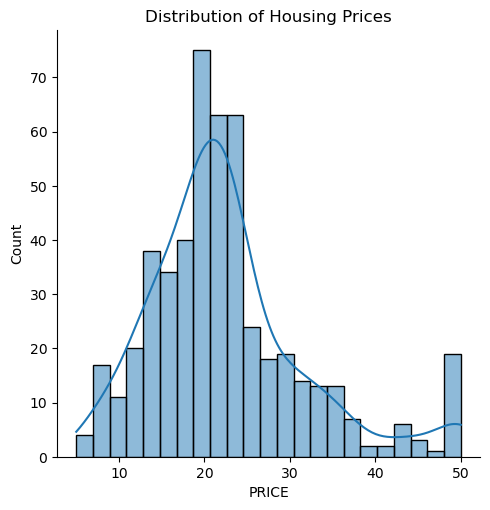

In [5]:
# Plot the distribution of the target variabl
sns.displot(boston_df['PRICE'], kde=True)
plt.title("Distribution of Housing Prices")
plt.show()

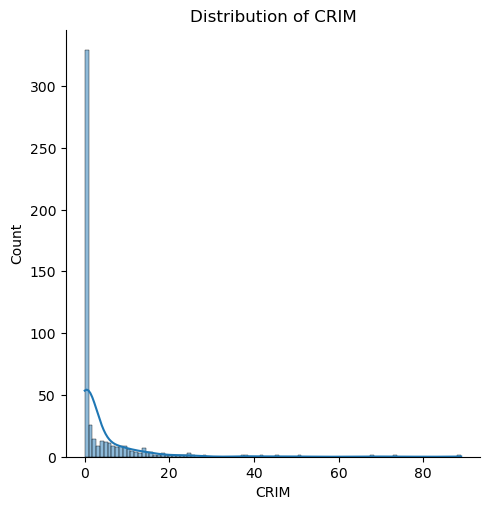

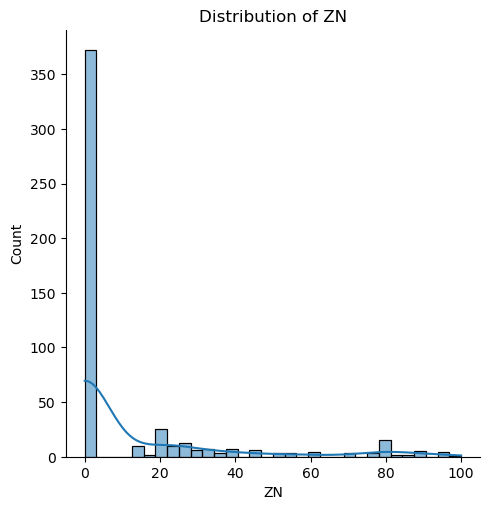

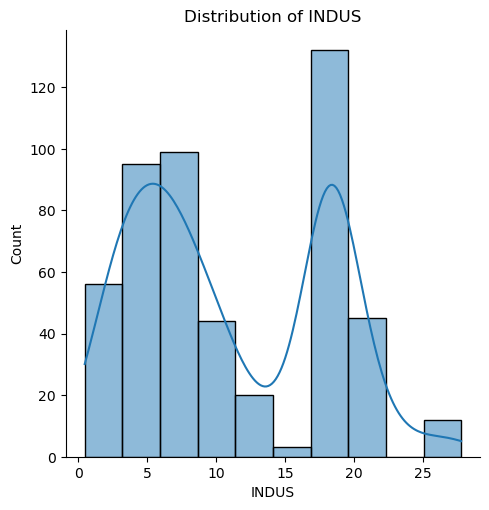

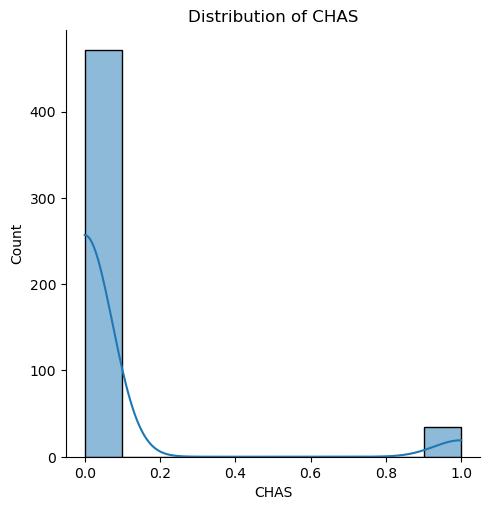

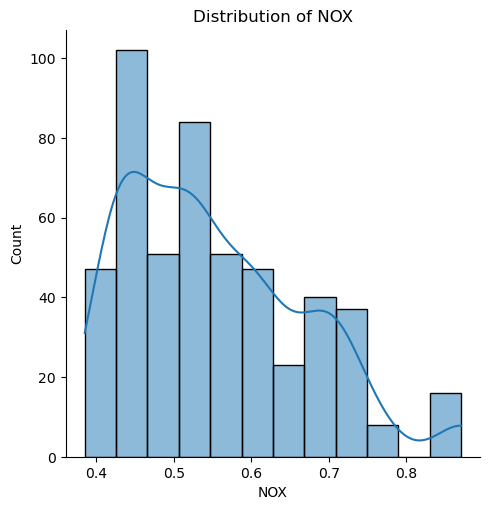

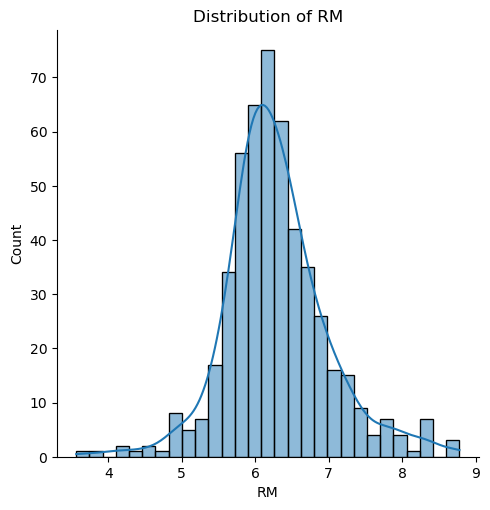

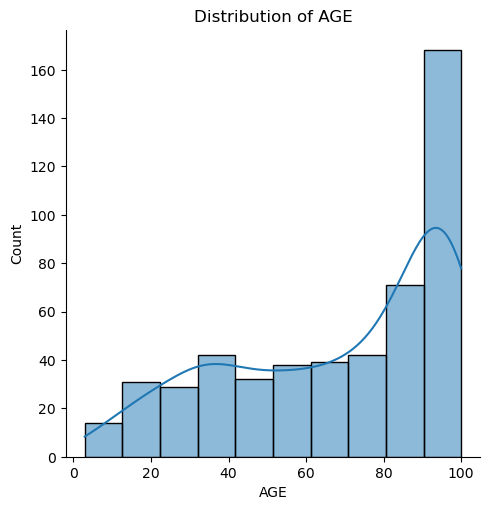

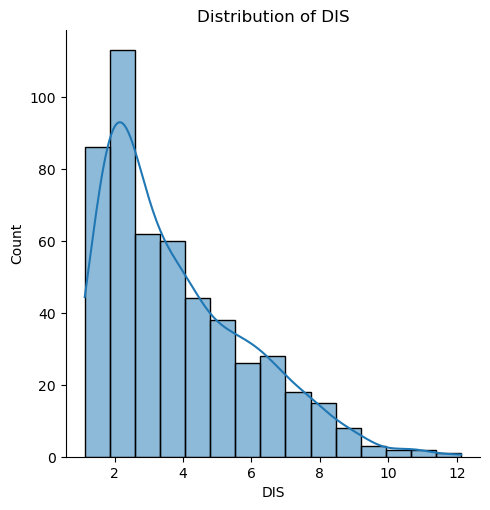

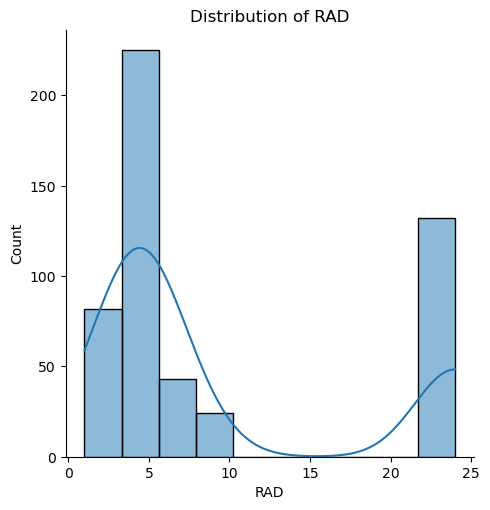

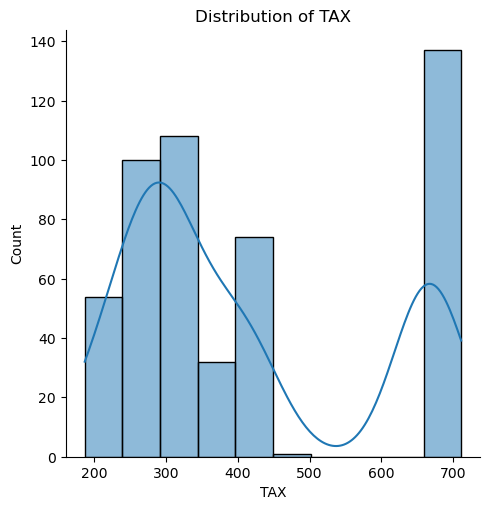

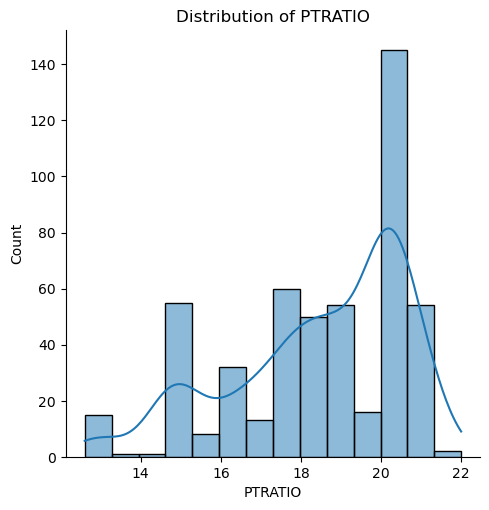

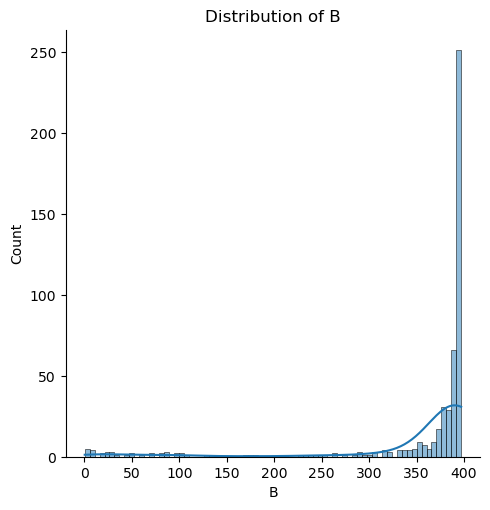

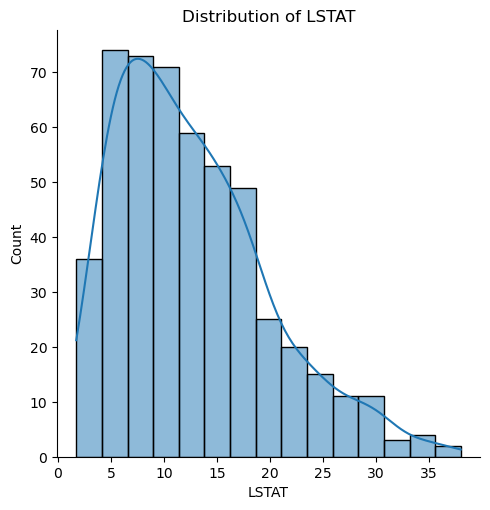

In [6]:
# Plot the distribution of each feature variable
for feature in boston_df.columns[:-1]:
    sns.displot(boston_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

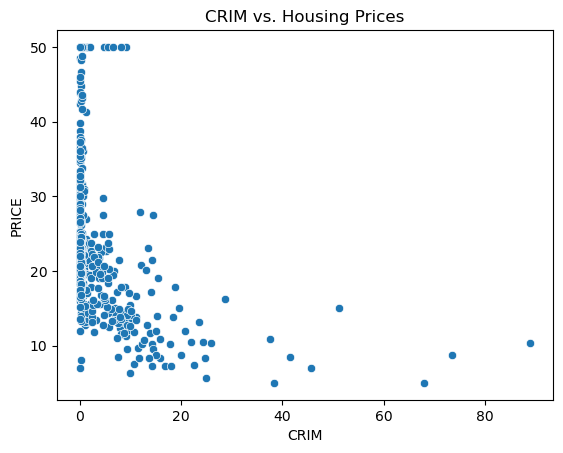

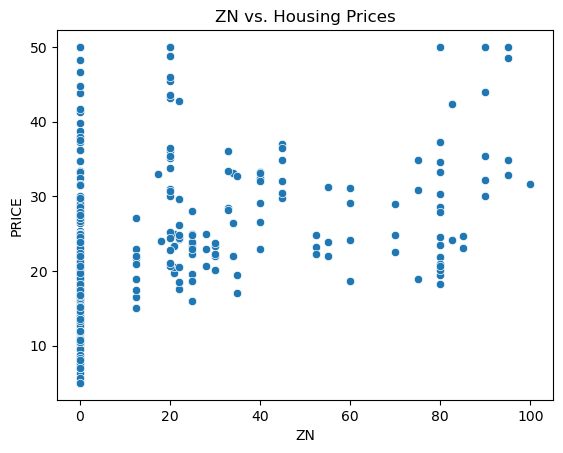

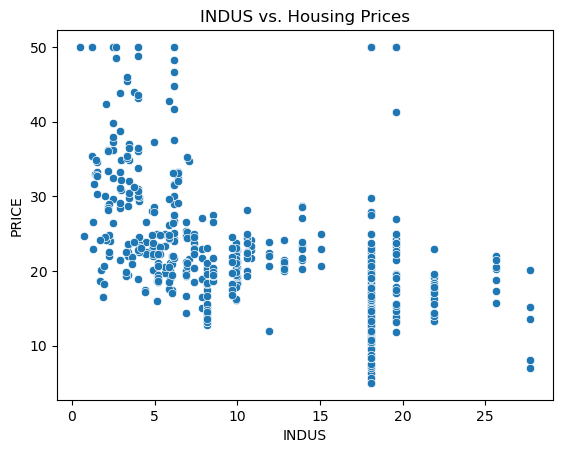

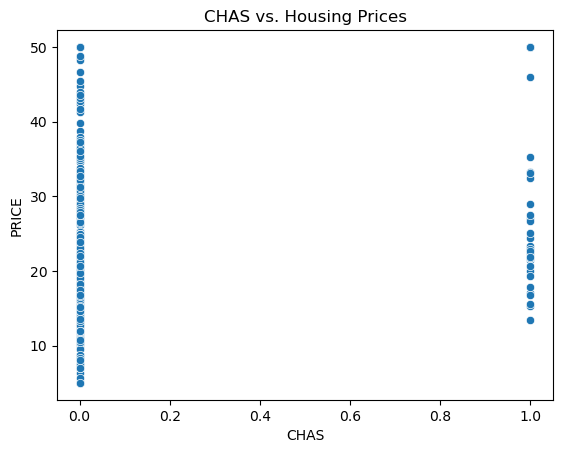

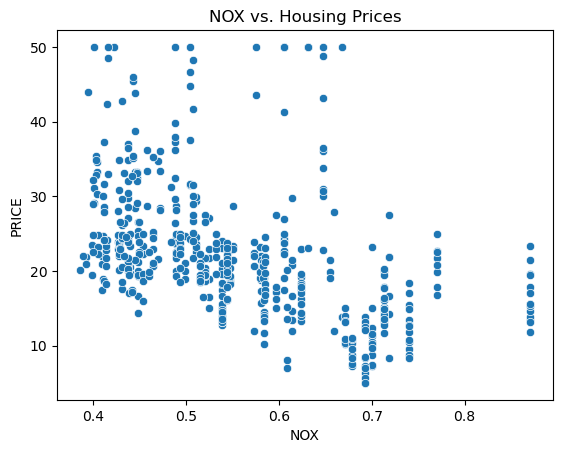

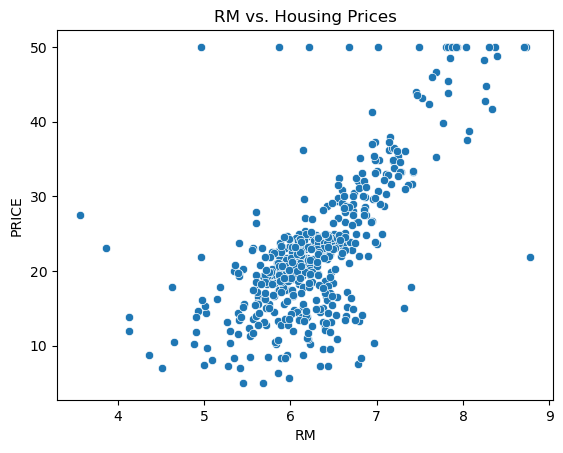

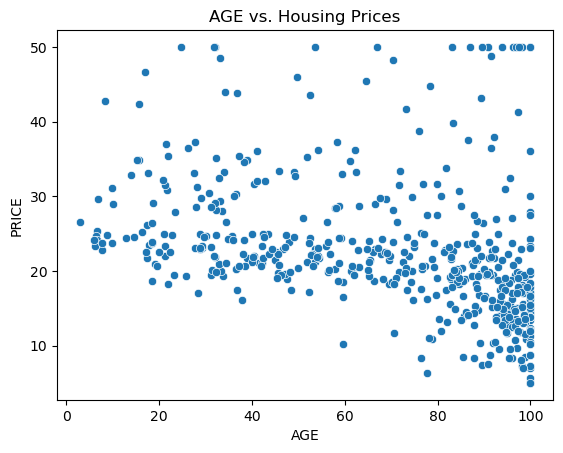

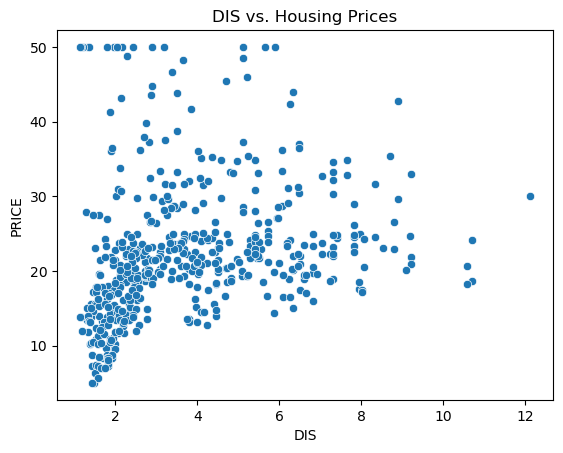

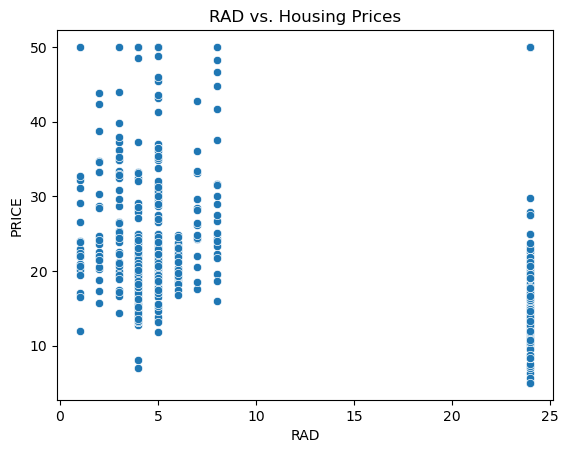

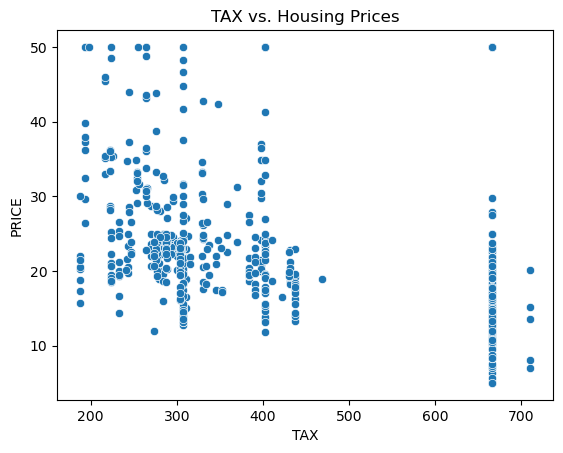

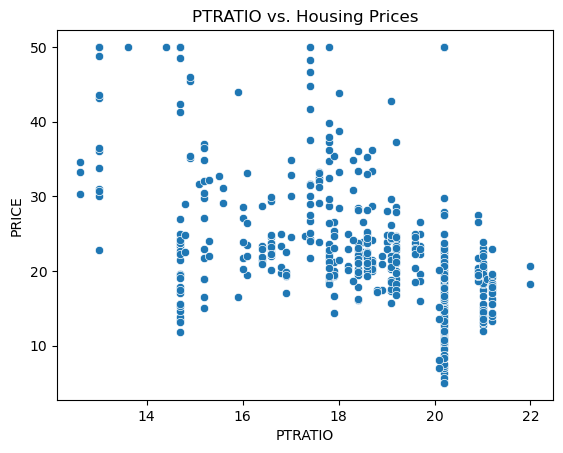

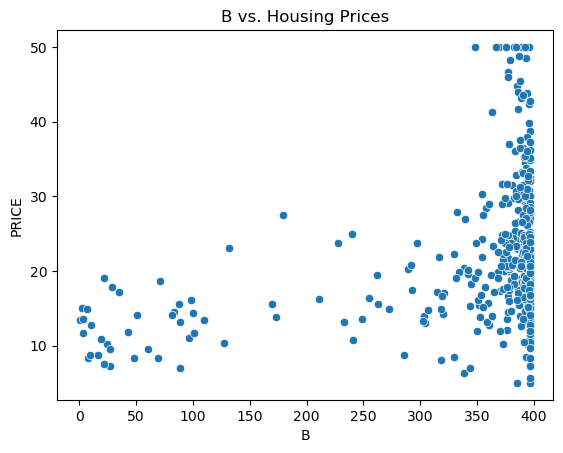

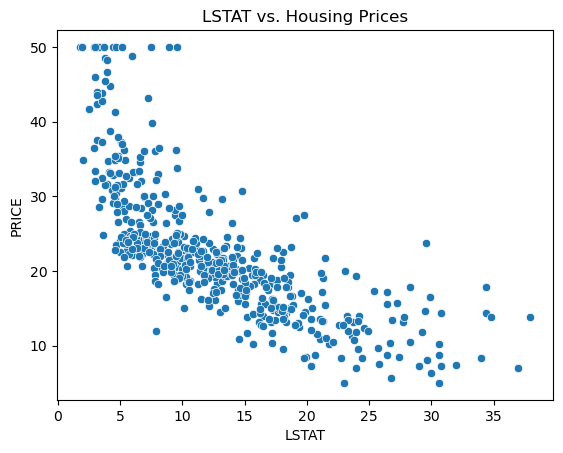

In [7]:
# Plot the scatter plots between each feature and the target variable
for feature in boston_df.columns[:-1]:
    sns.scatterplot(x=feature, y='PRICE', data=boston_df)
    plt.title(f"{feature} vs. Housing Prices")
    plt.show()

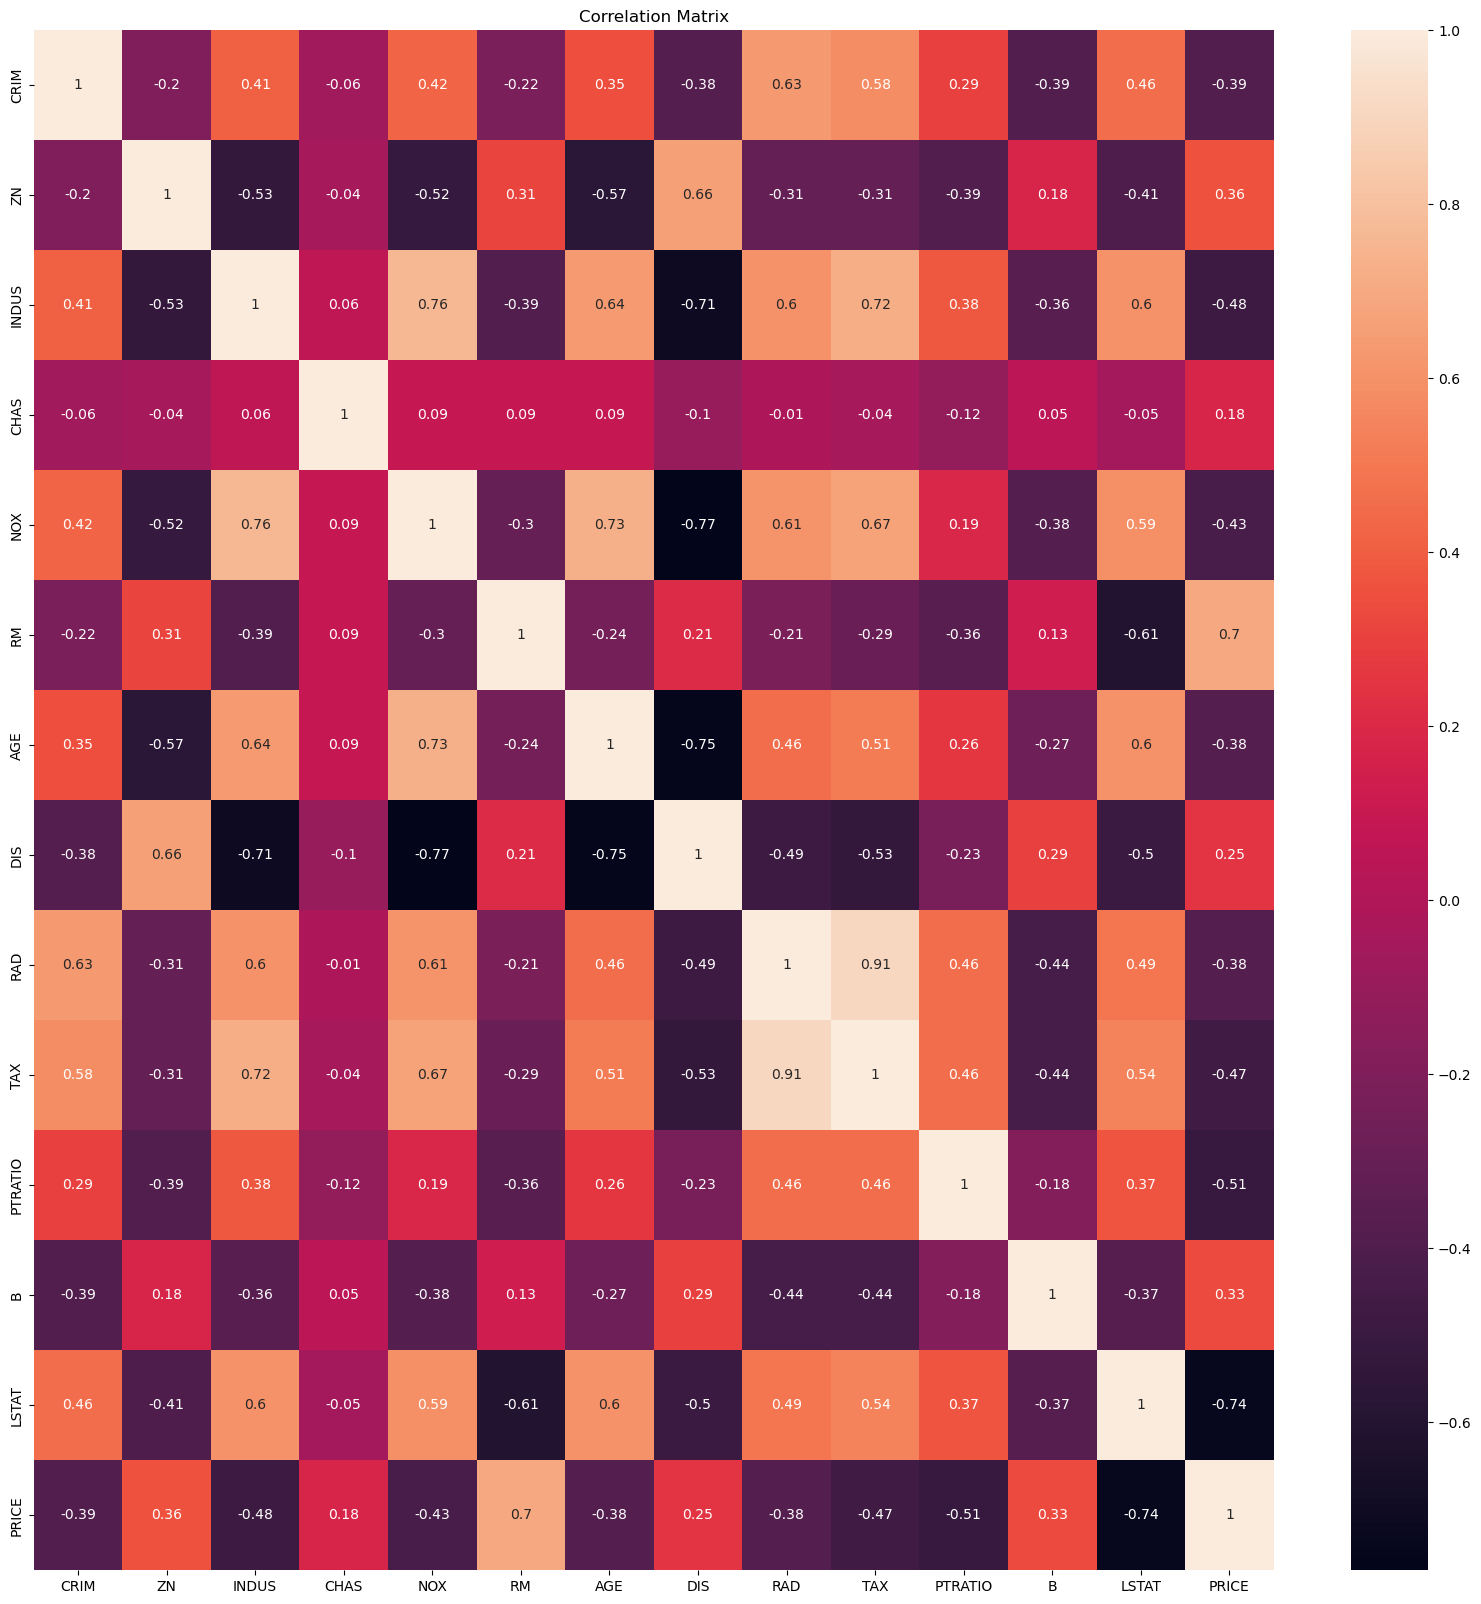

In [8]:
# Plot the correlation matrix
corr_matrix = boston_df.corr().round(2)
plt.figure(figsize=(20,20))
sns.heatmap(data=corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

## Data Splitting

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston_df[boston.feature_names], boston_df['PRICE'], test_size=0.2, random_state=42)


##  Model Creation and Training

### Linear Regression

In [10]:
# Create a linear regression model and fit it to the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Random Forest 

In [11]:
# Create a random forest regressor model and fit it to the training data
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### XGBoost

In [12]:
# Create an XGBoost regressor model and fit it to the training data
xgbr = XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

## Model Testing

### Linear Regression

In [13]:
y_pred_lr = lr.predict(X_test)

### Random Forest

In [14]:
y_pred_rfr = rfr.predict(X_test)

### XGBoost

In [15]:
y_pred_xgbr = xgbr.predict(X_test)

## Model Evaluation

### Linear Regression

In [17]:

# Calculate the mean squared error of the model's predictions
mse = mean_squared_error(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse:.2f}")

# Calculate the mean absolute error of the model's predictions
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate the R-squared score of the model's predictions
r2 = r2_score(y_test, y_pred_lr)
print(f"R-squared score: {r2:.2f}")


p = len(boston.feature_names)

# Calculate the number of samples in the test set
n = len(y_test)

# Calculate the adjusted R2 score
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"Adjusted R2 score: {adjusted_r2:.2f}")




Mean Squared Error: 24.29
Mean Absolute Error: 3.19
R-squared score: 0.67
Adjusted R2 score: 0.62


### Random Forest

In [18]:
# Calculate the mean squared error of the model's predictions
mse = mean_squared_error(y_test, y_pred_rfr)

print(f"Mean Squared Error: {mse:.2f}")

# Calculate the mean absolute error of the model's predictions
mae = mean_absolute_error(y_test, y_pred_rfr)
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate the R-squared score of the model's predictions
r2 = r2_score(y_test, y_pred_rfr)
print(f"R-squared score: {r2:.2f}")


p = len(boston.feature_names)

# Calculate the number of samples in the test set
n = len(y_test)

# Calculate the adjusted R2 score
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"Adjusted R2 score: {adjusted_r2:.2f}")


Mean Squared Error: 7.90
Mean Absolute Error: 2.04
R-squared score: 0.89
Adjusted R2 score: 0.88


### XGBoost

In [19]:
# Calculate the mean squared error of the model's predictions
mse = mean_squared_error(y_test, y_pred_xgbr)

print(f"Mean Squared Error: {mse:.2f}")

# Calculate the mean absolute error of the model's predictions
mae = mean_absolute_error(y_test, y_pred_xgbr)
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate the R-squared score of the model's predictions
r2 = r2_score(y_test, y_pred_xgbr)
print(f"R-squared score: {r2:.2f}")


p = len(boston.feature_names)

# Calculate the number of samples in the test set
n = len(y_test)

# Calculate the adjusted R2 score
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f"Adjusted R2 score: {adjusted_r2:.2f}")


Mean Squared Error: 7.58
Mean Absolute Error: 2.01
R-squared score: 0.90
Adjusted R2 score: 0.88
